# Experiments - Evolutionary Algorithm TSP

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from tsp_evolutionary_algorithm import TSPEvolutionaryAlgorithm
from Reporter import Reporter

In [2]:
# The dataset filenames
datasets = ['tour29.csv', 'tour100.csv', 'tour194.csv', 'tour929.csv']
benchmarks = [(27200, 30350.13), (7350, 8636.5), (9000, 11385.01), (95300, 113683.58)]

# Sequence of Experiments

## 1. Typical Convergence Graph

In [91]:
dataset_idx = 0

file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

reporter = Reporter(datasets[dataset_idx][:-4])
ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=100, mu=20, k=4,
                              recombination_probability=0.9,
                              mutation_probability=0.1,
                              local_search_probability=0.3)

while not ga.converged(improvement_criterion=True, improvement_threshold=100):
    ga.update()

    # extract results of current generation
    mean_objective = ga.mean_objective
    best_objective = ga.best_objective
    best_solution = ga.best_solution
    time_left = reporter.report(mean_objective,
                                best_objective,
                                best_solution)
    print(ga.state, time_left)
    if time_left < 0:
        break

Population initialized!
#1 Best Objective: 27363.44170094884 - Mean Objective: 29964.758188832206 - Diversity: 0.96 299.4393699169159
#2 Best Objective: 27363.44170094884 - Mean Objective: 29811.677817530566 - Diversity: 0.94 299.365149974823
#3 Best Objective: 27159.840231820173 - Mean Objective: 29277.552092976293 - Diversity: 0.91 299.2241005897522
#4 Best Objective: 27159.840231820173 - Mean Objective: 29355.476715374418 - Diversity: 0.9 299.14603090286255
#5 Best Objective: 27159.840231820173 - Mean Objective: 29325.431127540633 - Diversity: 0.88 299.06655073165894
#6 Best Objective: 27159.840231820173 - Mean Objective: 29311.108387943776 - Diversity: 0.88 298.98857045173645
#7 Best Objective: 27154.488399244645 - Mean Objective: 28961.42959456146 - Diversity: 0.87 298.85797095298767
#8 Best Objective: 27154.488399244645 - Mean Objective: 28850.199472941727 - Diversity: 0.89 298.7811439037323
#9 Best Objective: 27154.488399244645 - Mean Objective: 28920.28977918237 - Diversity: 0.

#76 Best Objective: 27154.48839924464 - Mean Objective: 28574.40431431483 - Diversity: 0.73 292.5544545650482
#77 Best Objective: 27154.48839924464 - Mean Objective: 31436.24925382725 - Diversity: 0.79 292.47134923934937
#78 Best Objective: 27154.48839924464 - Mean Objective: 28947.466625910736 - Diversity: 0.79 292.3862910270691
#79 Best Objective: 27154.48839924464 - Mean Objective: 28875.05915060663 - Diversity: 0.82 292.30834102630615
#80 Best Objective: 27154.48839924464 - Mean Objective: 28291.575789931096 - Diversity: 0.76 292.2287120819092
#81 Best Objective: 27154.48839924464 - Mean Objective: 28338.743649801632 - Diversity: 0.75 292.1541790962219
#82 Best Objective: 27154.48839924464 - Mean Objective: 28087.68918717417 - Diversity: 0.72 292.01252460479736
#83 Best Objective: 27154.48839924464 - Mean Objective: 28876.420071532102 - Diversity: 0.79 291.90838408470154
#84 Best Objective: 27154.48839924464 - Mean Objective: 27993.74046713742 - Diversity: 0.75 291.7235391139984
#8

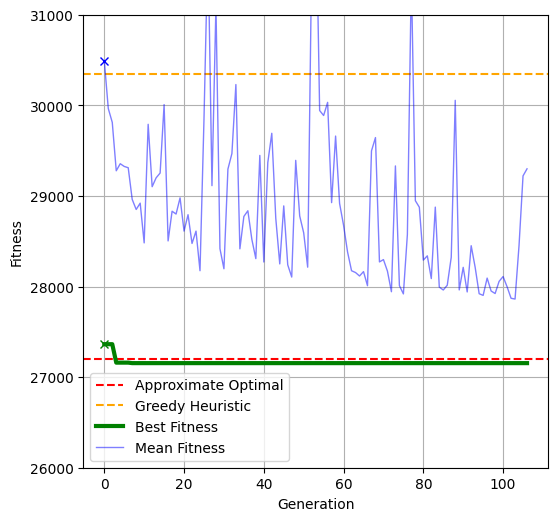

In [103]:
from matplotlib import pyplot as plt

def plot_convergence_graph(ga: TSPEvolutionaryAlgorithm, optimal, greedy):
    best_fitnesses = ga.best_history
    mean_fitnesses = ga.mean_history

    fig = plt.figure('Convergence Graph', figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.axhline(y=optimal, color='r', linestyle='--')
    plt.axhline(y=greedy, color='orange', linestyle='--')
    plt.plot(best_fitnesses, 'g', alpha=1, lw=3)
    plt.plot(mean_fitnesses, 'b', alpha=0.5, lw=1)
    plt.plot(0, best_fitnesses[0], 'gx')
    plt.plot(0, mean_fitnesses[0], 'bx')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend(['Approximate Optimal', 'Greedy Heuristic', 'Best Fitness', 'Mean Fitness'])
    plt.grid(True)
    plt.ylim([26000, 31000])
    #plt.ylim([80000, 0.2e6])
    plt.show()

plot_convergence_graph(ga, optimal=benchmarks[dataset_idx][0], greedy=benchmarks[dataset_idx][1])

## 2. Best Tour Length and Best Sequence of Cities

In [109]:
print(f'Best solution:\n\tfitness = {ga.best_solution.fitness}')
print(f'\troute = {ga.best_solution.route}')

Best solution:
	fitness = 27154.48839924464
	route = [2, 6, 8, 12, 13, 15, 23, 24, 26, 19, 25, 27, 28, 22, 21, 20, 16, 17, 18, 14, 11, 10, 9, 5, 0, 1, 4, 7, 3]


## 3. Results Interpretation 

## 4. Histogram of Best and Mean Fitnesses for 1000 iterations (only for tour29)

In [ ]:
dataset_idx = 0
file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

best_fitnesses = []
mean_fitnesses = []

while len(best_fitnesses) < 1000:
    reporter = Reporter(datasets[dataset_idx][:-4] + f'_{iter}')
    ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=100, mu=20, k=4,
                                  recombination_probability=0.9,
                                  mutation_probability=0.1)
    
    while not ga.converged(improvement_criterion=True):
        ga.update()

        # extract results of current generation
        mean_objective = ga.mean_objective
        best_objective = ga.best_objective
        best_solution = ga.best_solution
#         time_left = reporter.report(mean_objective,
#                                     best_objective,
#                                     best_solution)
        

    best_fitnesses.append(best_objective)
    mean_fitnesses.append(mean_objective)
    print(f'#{len(best_fitnesses)} converged!')

print(best_solution.route)

Population initialized!
#1 converged!
Population initialized!
#2 converged!
Population initialized!
#3 converged!
Population initialized!
#4 converged!
Population initialized!
#5 converged!
Population initialized!
#6 converged!
Population initialized!
#7 converged!
Population initialized!
#8 converged!
Population initialized!
#9 converged!
Population initialized!
#10 converged!
Population initialized!
#11 converged!
Population initialized!
#12 converged!
Population initialized!
#13 converged!
Population initialized!
#14 converged!
Population initialized!
#15 converged!
Population initialized!
#16 converged!
Population initialized!
#17 converged!
Population initialized!
#18 converged!
Population initialized!
#19 converged!
Population initialized!
#20 converged!
Population initialized!
#21 converged!
Population initialized!
#22 converged!
Population initialized!
#23 converged!
Population initialized!
#24 converged!
Population initialized!
#25 converged!
Population initialized!
#26 conver

In [108]:
from matplotlib import pyplot as plt

def plot_histograms(best_fitnesses, mean_fitnesses):
    fig = plt.figure('Histograms of 1000 runs', figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 2, 1)
    fig.add_subplot(1, 2, 2)
    ax = fig.axes
    labels = ['Best Fitnesses', 'Mean Fitnesses']

    for idx in range(2):
        ax[idx].set_xlabel(labels[idx])
        ax[idx].set_ylabel("Count")
        ax[idx].set_title(f'Histogram of {labels[idx]} for 1000 runs')
        ax[idx].grid(True)
        ax[idx].hist([best_fitnesses, mean_fitnesses][idx], bins=10)

    plt.show()
    
""" Plot the histograms """
plot_histograms(best_fitnesses, mean_fitnesses)

NameError: name 'best_fitnesses' is not defined